# Emulatte 1.0 introduction

## Sample Code

### Frequency-domain, Vertical Magnetic Dipole

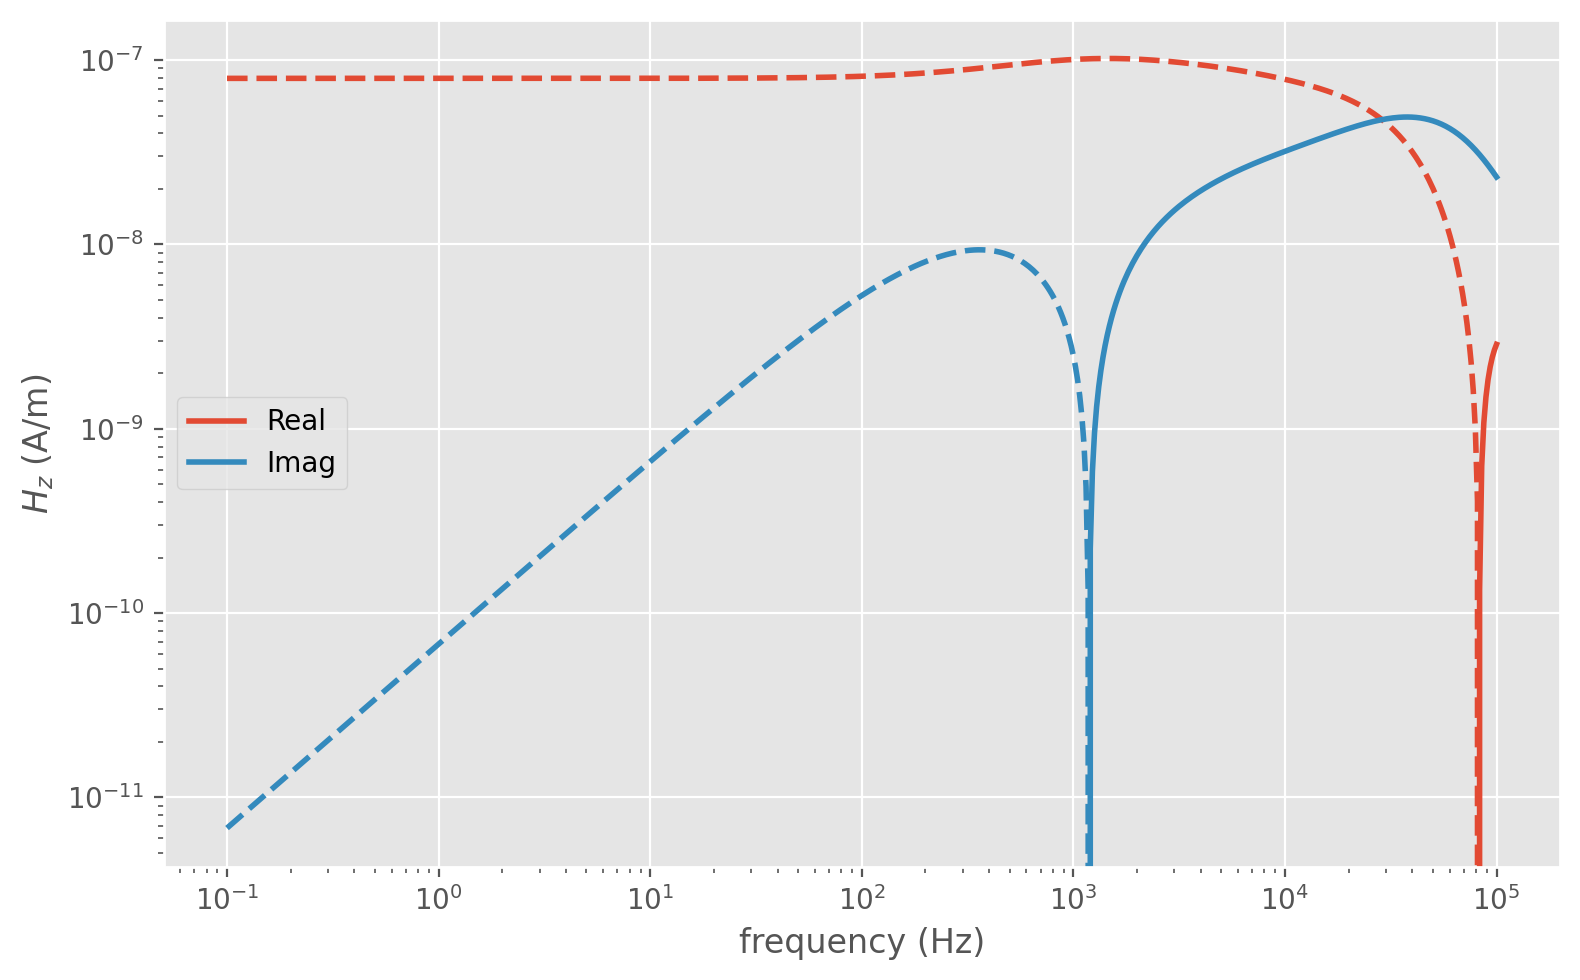

In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt

sys.path.append('../')

import emulatte as emu
from emulatte.source import VMD

### parameter specification ###
# source coordinate [x,y,z]
tx = [0,0,0]
# receiver coordinate [x,y,z]
rx = [100,0,0]
# layer thickness
thicks = [30,60]
# resistivity of the layers
res = [100,10,100]
# frequency of transmittion
freq = np.logspace(-1, 5, 601)
# magnetic dipole moment
moment = 1

# create instances for model and source
model = emu.create_model(thicks)
vmd = VMD(moment)

# setting source & parameters
model.set_params(res)
model.set_source(vmd, tx)
model.set_filter(hankel_filter='key201')

# proceed the calculation & get answer
hz = model.field("H", "z", rx, freq)

# plot
plt.style.use('ggplot')
fig = plt.figure(figsize=(8,5), facecolor='w', dpi=200)
ax = fig.add_subplot(111)
ax.plot(freq, hz.real, "C0-", label=r'Real', linewidth=2)
ax.plot(freq, -hz.real, "C0--", linewidth=2)
ax.plot(freq, hz.imag, "C1-", label=r'Imag', linewidth=2)
ax.plot(freq, -hz.imag, "C1--", linewidth=2)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('frequency (Hz)')
ax.set_ylabel('$H_z$ (A/m)')
ax.legend()
ax.grid(True)
plt.tight_layout()
plt.show()

No handles with labels found to put in legend.


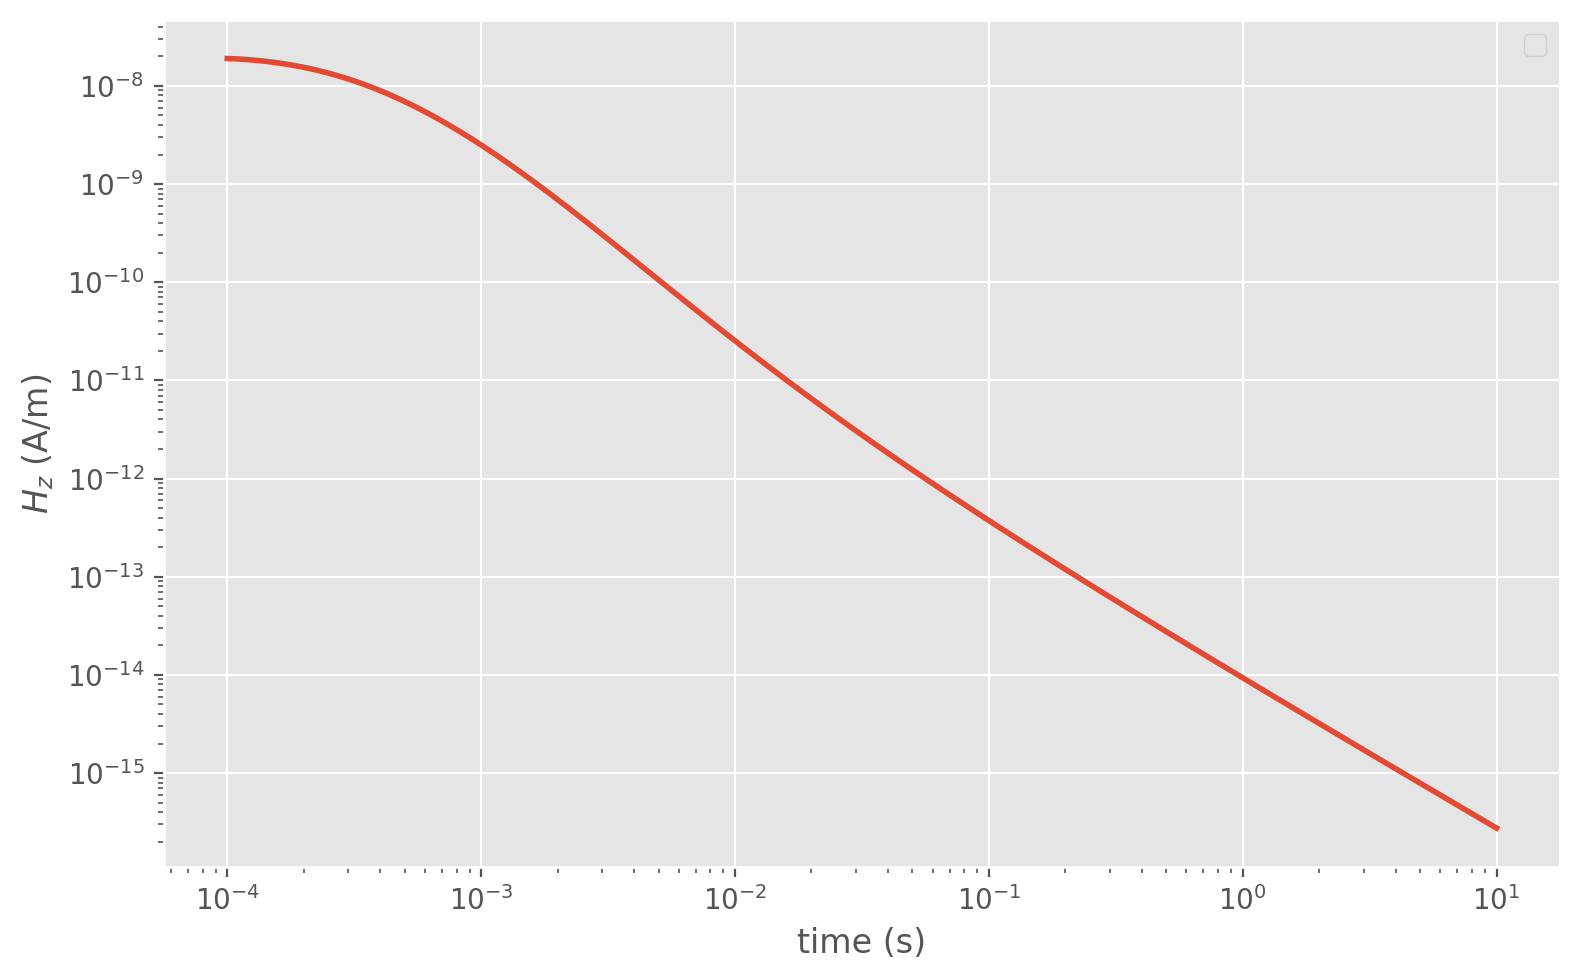

In [11]:
import sys
import numpy as np
import matplotlib.pyplot as plt

sys.path.append('../')

import emulatte as emu
from emulatte.source import VMD

### parameter specification ###
# source coordinate [x,y,z]
tx = [0,0,0]
# receiver coordinate [x,y,z]
rx = [100,0,0]
# layer thickness
thicks = [30,60]
# resistivity of the layers
res = [100,10,100]
# frequency of transmittion
time = np.logspace(-4, 1, 601)
# magnetic dipole moment
moment = 1

# create instances for model and source
model = emu.create_model(thicks)
vmd = VMD(moment, ontime=-1)

# setting source & parameters
model.set_params(res)
model.set_source(vmd, tx)
model.set_filter(hankel_filter='key201')

# proceed the calculation & get answer
hz = model.field("H", "z", rx, time)

# plot
plt.style.use('ggplot')
fig = plt.figure(figsize=(8,5), facecolor='w', dpi=200)
ax = fig.add_subplot(111)
ax.plot(time, hz.real, "C0-", linewidth=2)
ax.plot(time, -hz.real, "C0--", linewidth=2)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('time (s)')
ax.set_ylabel('$H_z$ (A/m)')
ax.legend()
ax.grid(True)
plt.tight_layout()
plt.show()

No handles with labels found to put in legend.


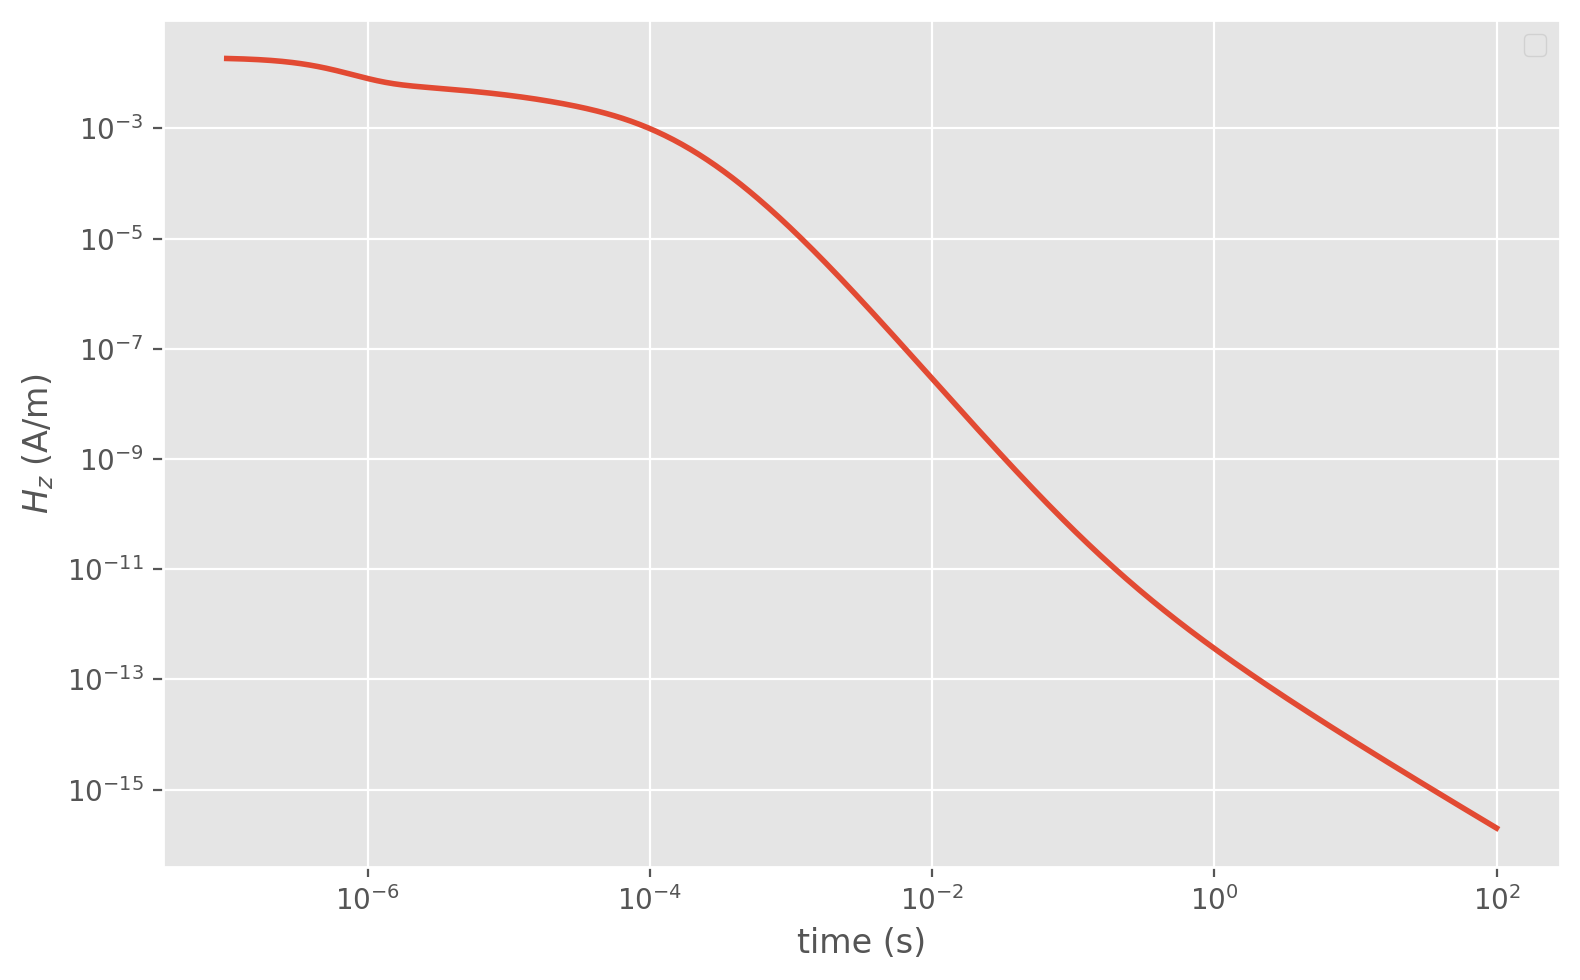

In [2]:
from emulatte.source import HCL

### parameter specification ###
# source coordinate [x,y,z]
tx = [0,0,0]
# receiver coordinate [x,y,z]
rx = [0,0,0]
# layer thickness
thicks = [10,10]
# resistivity of the layers
res = [100,1,1000]
# frequency of transmittion
time = np.logspace(-7, 2, 601)
# electrical current of loop
current = 1
# radius of loop
radius = 15

# create instances for model and source
model = emu.create_model(thicks)
hcl = HCL(current, radius, ontime=-1)

# setting source & parameters
model.set_params(res)
model.set_source(hcl, tx)
model.set_filter(hankel_filter='key201')

# proceed the calculation & get answer
hz = model.field("H", "z", rx, time)

# plot
plt.style.use('ggplot')
fig = plt.figure(figsize=(8,5), facecolor='w', dpi=200)
ax = fig.add_subplot(111)
ax.plot(time, hz, "C0-", linewidth=2)
ax.plot(time, -hz, "C0--", linewidth=2)
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlabel('time (s)')
ax.set_ylabel('$H_z$ (A/m)')
ax.legend()
ax.grid(True)
plt.tight_layout()
plt.show()

No handles with labels found to put in legend.


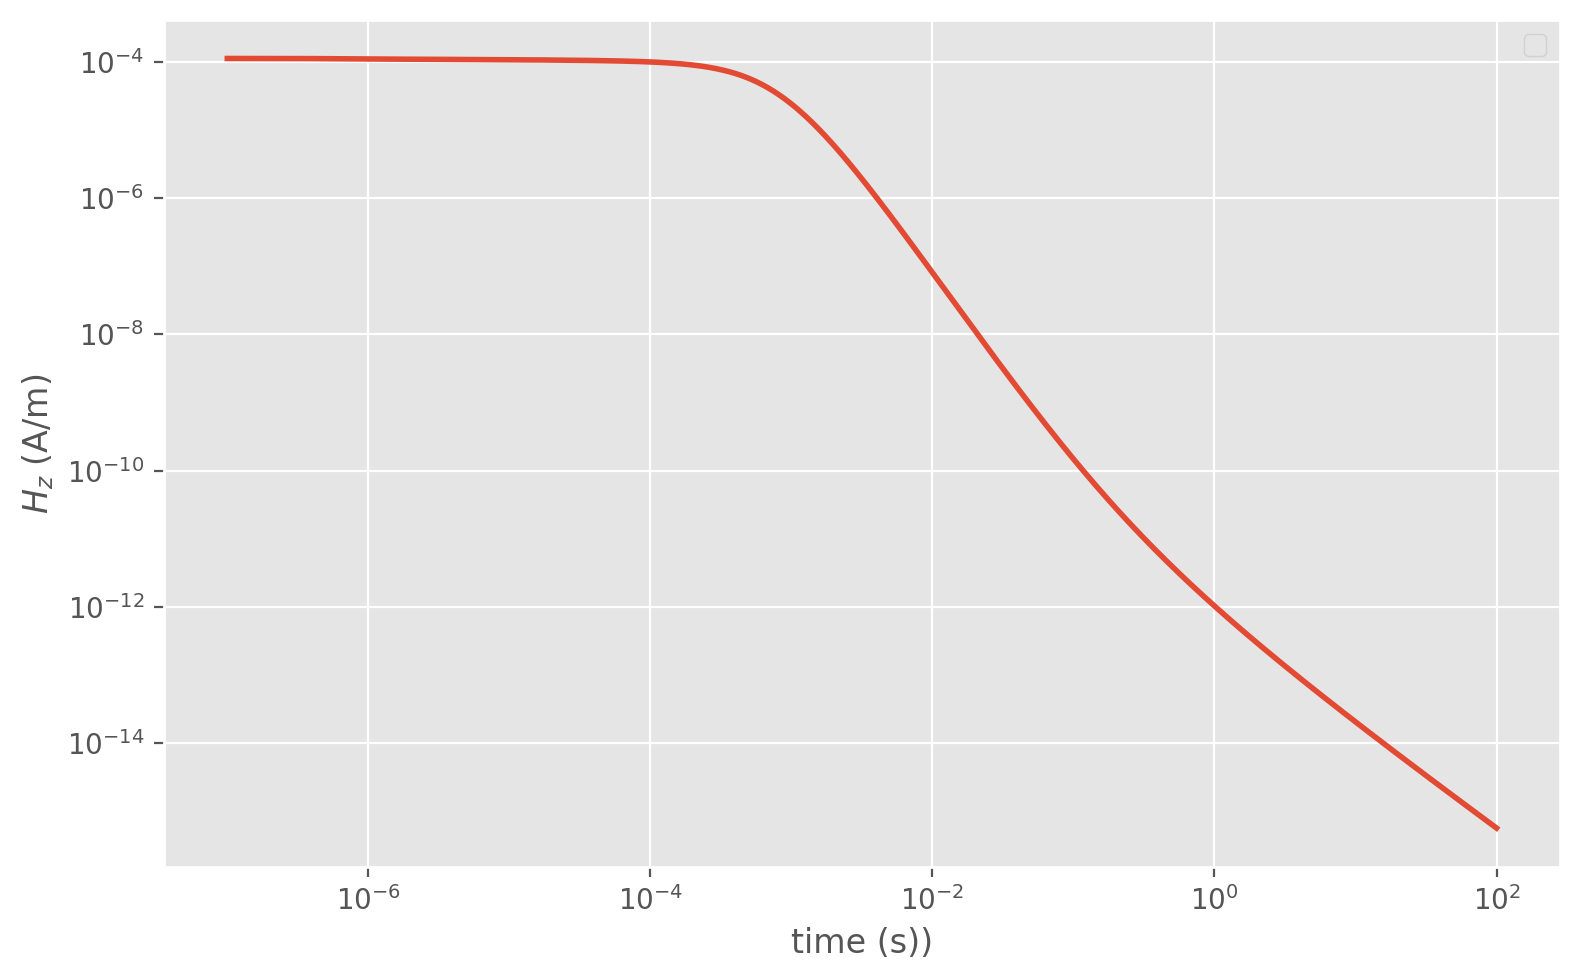

CPU times: user 906 ms, sys: 311 ms, total: 1.22 s
Wall time: 497 ms


In [5]:
%%time
from emulatte.source import HGW

### parameter specification ###
# source coordinate [x,y,z]
tx = [[-10,-10,0.01],[10,10,0.01]]
# receiver coordinate [x,y,z]
rx = [-100,100,0]
# layer thickness
thicks = [10,10]
# resistivity of the layers
res = [100,1,1000]
# frequency of transmittion
time = np.logspace(-7, 2, 60001)
# electrical current of loop
current = 1

# create instances for model and source
model = emu.create_model(thicks)
hgw = HGW(current, ontime=-1)

# setting source & parameters
model.set_params(res)
model.set_source(hgw, tx)
model.set_filter(hankel_filter='key201')

# proceed the calculation & get answer
hz = model.field("H", "z", rx, time)

# plot
plt.style.use('ggplot')
fig = plt.figure(figsize=(8,5), facecolor='w', dpi=200)
ax = fig.add_subplot(111)
ax.plot(time, hz, "C0-", linewidth=2)
ax.plot(time, -hz, "C0--", linewidth=2)
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlabel('time (s))')
ax.set_ylabel('$H_z$ (A/m)')
ax.legend()
ax.grid(True)
plt.tight_layout()
plt.show()

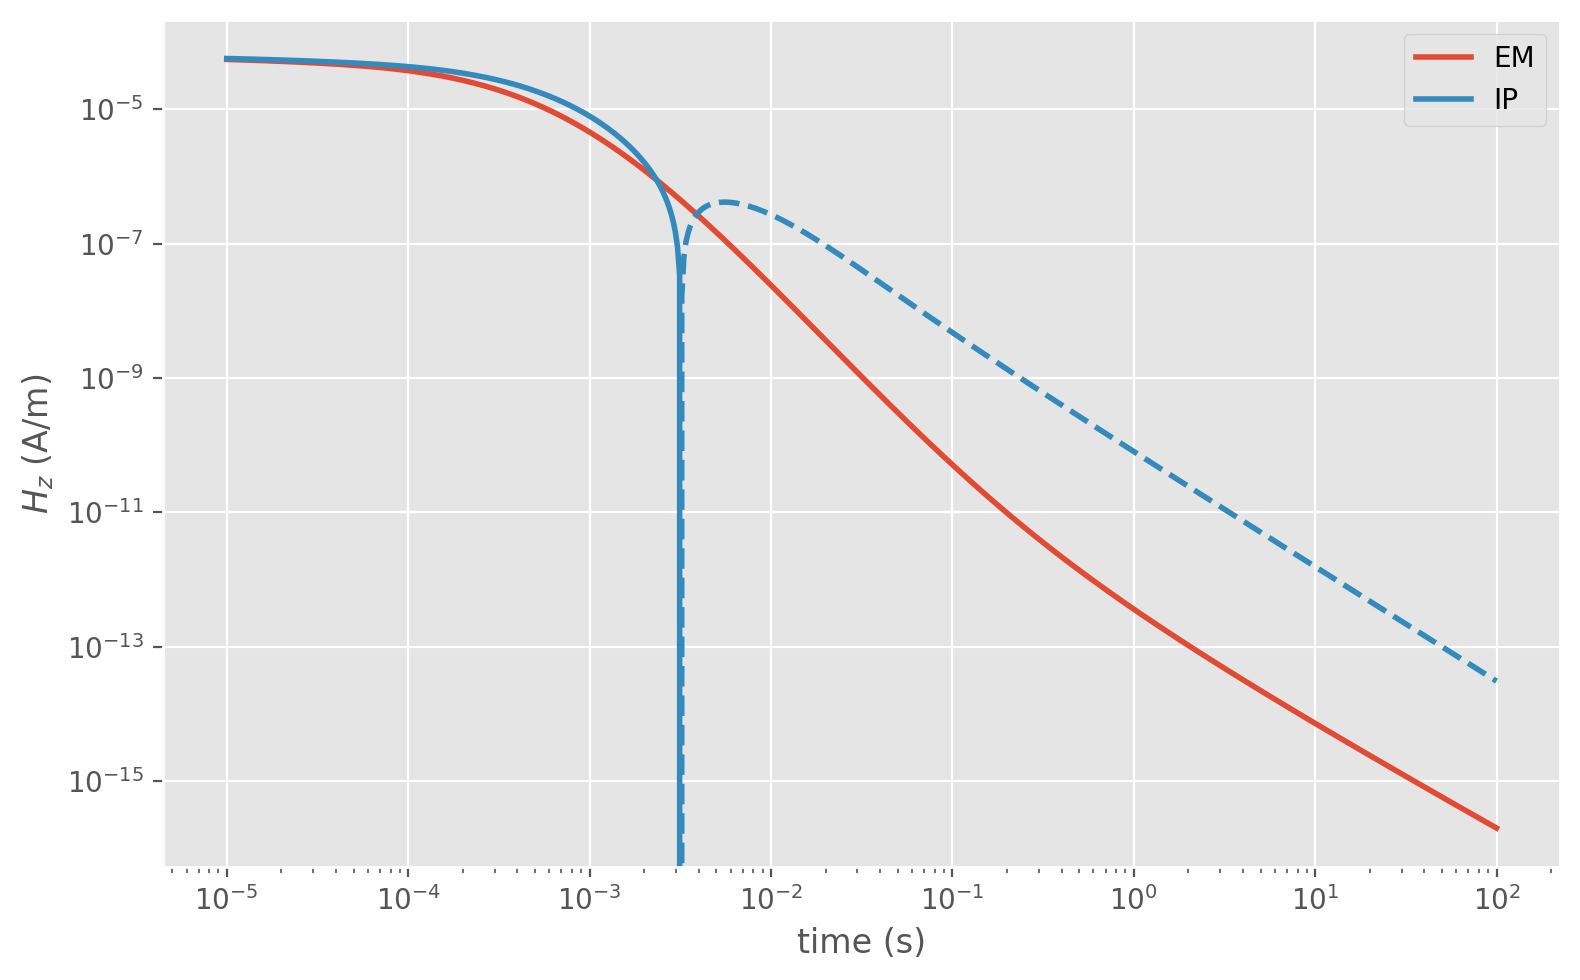

In [13]:
### parameter specification ###
# source coordinate [x,y,z]
tx = [0,0,-50]
# receiver coordinate [x,y,z]
rx = [0,0,-50]
# layer thickness
thicks = [10,10]
# cole-cole parameter of the layers
res = [100,1,1000]
m = [0, 0.4, 0]
t = [0, 1e-2, 0]
c = [0, 0.7, 0]
# frequency of transmittion
time = np.logspace(-5, 2, 601)
# electrical current of loop
current = 1
# radius of loop
radius = 15

# create instances for model and source
model = emu.create_model(thicks, state='ip')
hcl = HCL(current, radius, ontime=-1)

# setting source & parameters
model.set_params(res, m, t, c)
model.set_source(hcl, tx)
model.set_filter(hankel_filter='key201')

# proceed the calculation & get answer
hzip = model.field("H", "z", rx, time)


# create instances for model and source
model = emu.create_model(thicks)

# setting source & parameters
model.set_params(res)
model.set_source(hcl, tx)
model.set_filter(hankel_filter='key201')

# proceed the calculation & get answer
hz = model.field("H", "z", rx, time)

# plot
plt.style.use('ggplot')
fig = plt.figure(figsize=(8,5), facecolor='w', dpi=200)
ax = fig.add_subplot(111)
ax.plot(time, hz, "C0-", linewidth=2, label='EM')
ax.plot(time, -hz, "C0--", linewidth=2)
ax.plot(time, hzip, "C1-", linewidth=2, label='IP')
ax.plot(time, -hzip, "C1--", linewidth=2)
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlabel('time (s)')
ax.set_ylabel('$H_z$ (A/m)')
ax.grid(True)
ax.legend()
plt.tight_layout()
plt.show()

In [14]:
ex, ey = model.field("E", "xy", rx, time)

In [16]:
ey

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.